[[ 0.06250249 -0.01799357]
 [-0.01799357  0.01439027]] [[0.0625, -0.018], [-0.018, 0.0144]]


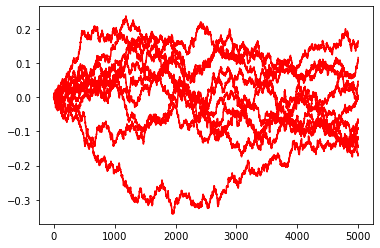

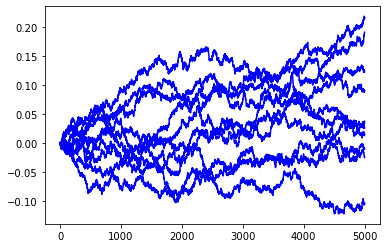

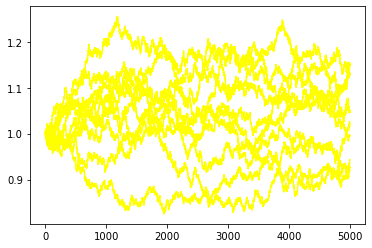

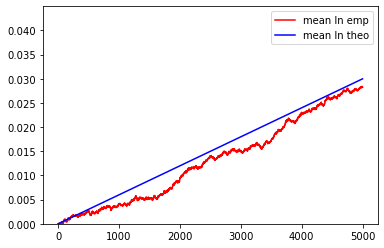

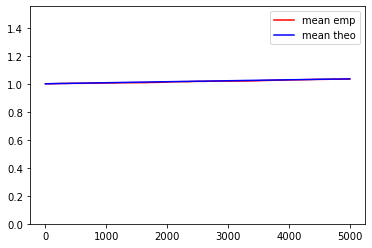

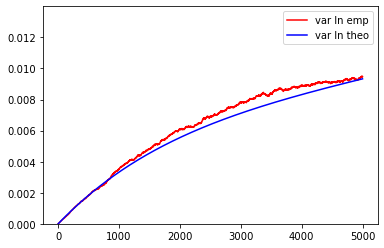

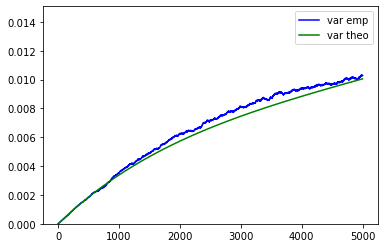

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

T = .5
nb_simu = 1000
nb_time = 5000

rho = -.6
sigma_chi = .25
sigma_xi = 0.12

# theta_t = xi_t + mu_xi / kappa
# level of mean reversion is given by Xi0 + mu_xi * t + mu_xi / kappa in mean (in mean)

kappa = 2.0
mu_xi = .06

Chi0 = .0
S0 = 1.0
Xi0 = math.log(1.0) - Chi0

dt = T / float(nb_time)
dt_sqrt = math.sqrt(dt)

mean = [.0, .0]
cov = [[sigma_chi * sigma_chi, rho * sigma_chi * sigma_xi], [rho * sigma_xi * sigma_chi, sigma_xi * sigma_xi]]

dX_t, dY_t = np.random.multivariate_normal(mean, cov, nb_simu * nb_time).T * dt_sqrt

cov_test = np.cov(dX_t, dY_t) / dt

print(cov_test, cov)

S = np.zeros((nb_simu, nb_time))
Chi = np.zeros((nb_simu, nb_time))
Xi = np.zeros((nb_simu, nb_time))
t = np.arange(0, T, dt)

for i in range(0, nb_simu):
    Chi[i][0] = Chi0
    Xi[i][0] = Xi0
    S[i][0] = math.exp(Chi0 + Xi0)
  
for i in range(0, nb_simu):
    for j in range(1, nb_time):
        Chi[i][j] = Chi[i][j-1] - kappa * Chi[i][j-1] * dt + dX_t[i * nb_time + j]
        Xi[i][j] = Xi[i][j-1] + mu_xi * dt + dY_t[i * nb_time + j]
        S[i][j] = math.exp(Chi[i][j] + Xi[i][j])
        
for i in range(0, 10):
    plt.plot(Chi[i], color='red')
    
plt.show()

for i in range(0, 10):
    plt.plot(Xi[i], color='blue')
    
plt.show()

for i in range(0, 10):
    plt.plot(S[i], color='yellow')
    
plt.show()

mean_S_emp = np.zeros((nb_time))
var_S_emp = np.zeros((nb_time))
mean_lnS_emp = np.zeros((nb_time))
var_lnS_emp = np.zeros((nb_time))

mean_lnS = Xi0 + mu_xi * t + np.exp(-kappa * t) * Chi0
var_lnS = .5 * sigma_chi * sigma_chi / kappa * (1.0 - np.exp(- 2.0 * kappa * t)) \
    + sigma_xi * sigma_xi * t + 2.0 * rho * sigma_chi * sigma_xi / kappa * (1.0 - np.exp(- kappa * t))
mean_S_theo = np.exp(mean_lnS + .5 * var_lnS)

var_S_theo = np.exp(2.0 * mean_lnS + var_lnS) * (np.exp(var_lnS) - 1.0)

for i in range(0, nb_time):
    mean_S_emp[i] = np.mean(S[:,i])
    var_S_emp[i] = np.var(S[:,i])
    mean_lnS_emp[i] = np.mean(np.log(S[:,i]))
    var_lnS_emp[i] = np.var(np.log(S[:,i]))
 
plt.plot(mean_lnS_emp, color='red', label='mean ln emp')
plt.plot(mean_lnS, color='blue', label='mean ln theo')
plt.legend()
plt.ylim(.0, 1.5 * max(mean_lnS))
plt.show()                            
                            
plt.plot(mean_S_emp, color='red', label='mean emp')
plt.plot(mean_S_theo, color='blue', label='mean theo')
plt.legend()
plt.ylim(.0, 1.5 * max(mean_S_theo))
plt.show()
                            
plt.plot(var_lnS_emp, color='red', label='var ln emp')
plt.plot(var_lnS, color='blue', label='var ln theo')
plt.legend()
plt.ylim(.0, 1.5 * max(var_lnS))
plt.show()                         

plt.plot(var_S_emp, color='blue', label='var emp')
plt.plot(var_S_theo, color='green', label='var theo')
plt.legend()
plt.ylim(0, 1.5 * max(var_S_theo))
plt.show()

In [ ]:
Hedge

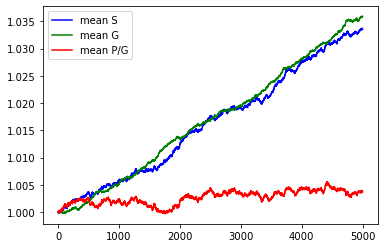

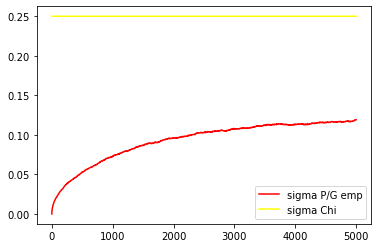

Simulation number 0
Simulation number 1
Simulation number 2
Simulation number 3
Simulation number 4
Simulation number 5
Simulation number 6
Simulation number 7
Simulation number 8
Simulation number 9


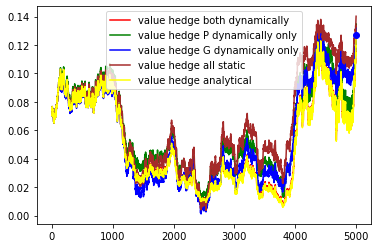

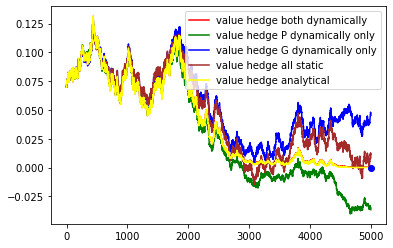

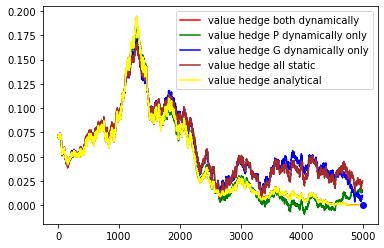

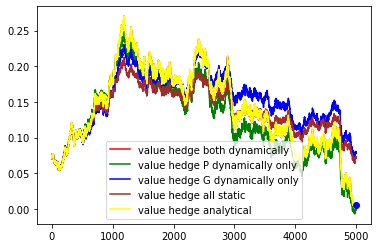

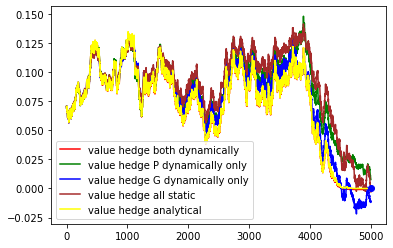

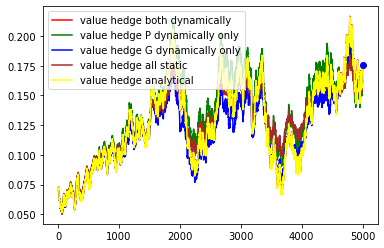

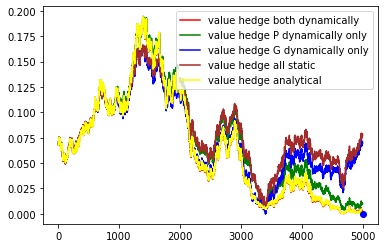

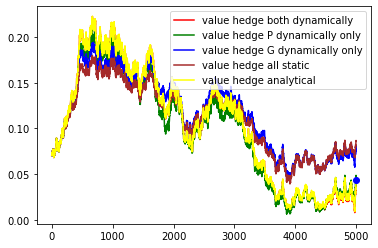

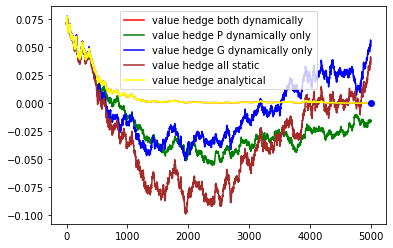

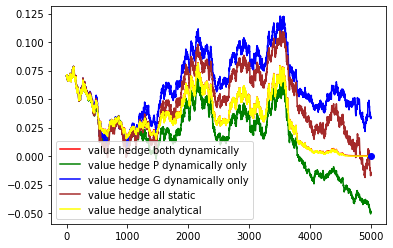

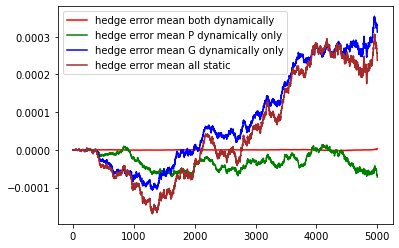

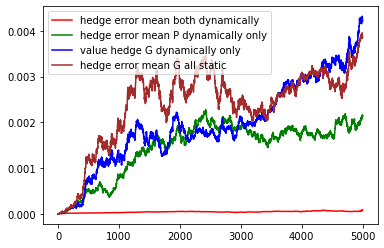

In [6]:
from scipy.stats import norm

P = S
G = np.exp(Xi)

EPSILON = 10e-5
floor = np.full((nb_simu, nb_time), EPSILON)

P = np.maximum(P, floor)
G = np.maximum(G, floor)

PG = np.zeros((nb_simu, nb_time))

for i in range(0, nb_simu):
    PG[i,:] = np.divide(P[i,:], G[i,:])

mean_P_emp = np.zeros((nb_time))
mean_G_emp = np.zeros((nb_time))
mean_PG_emp = np.zeros((nb_time))
var_PG_emp = np.zeros((nb_time))

for i in range(0, nb_time):
    mean_P_emp[i] = np.mean(P[:,i])
    mean_G_emp[i] = np.mean(G[:,i])
    mean_PG_emp[i] = np.mean(PG[:,i])
    var_PG_emp[i] = np.var(PG[:,i])

plt.plot(mean_P_emp, color='blue', label='mean S')
plt.plot(mean_G_emp, color='green', label='mean G')
plt.plot(mean_PG_emp, color='red', label='mean P/G')
plt.legend()
plt.show()


_nb_simu = 10

'''
for i in range(0, min(10,_nb_simu)): 
    plt.plot(P[i,:], color='red', label='P')
    plt.legend()    
plt.show()

for i in range(0, min(10,_nb_simu)): 
    plt.plot(G[i,:], color='red', label='G')
    plt.legend()    
plt.show()
'''

def d1(P, G, tau, sigma_hat):
    return (math.log(P / G) + .5 * sigma_hat * sigma_hat * tau) / (sigma_hat * math.sqrt(tau))

def d2(P, G, tau, sigma_hat):
    return (math.log(P / G) - .5 * sigma_hat * sigma_hat * tau) / (sigma_hat * math.sqrt(tau))

def magrabe(P, G, tau, sigma_hat):
    return P * norm.cdf(d1(P, G, tau, sigma_hat)) - G * norm.cdf(d2(P, G, tau, sigma_hat))

v_B = np.zeros((nb_simu, nb_time))
v_P = np.zeros((nb_simu, nb_time))
v_G = np.zeros((nb_simu, nb_time))

#both dynamically
value_hedge_1 = np.zeros((nb_simu, nb_time))
v_B_1 = np.zeros((nb_simu, nb_time))

#P dynamically only
value_hedge_2 = np.zeros((nb_simu, nb_time))
v_B_2 = np.zeros((nb_simu, nb_time))

#G dynamically only
value_hedge_3 = np.zeros((nb_simu, nb_time))
v_B_3 = np.zeros((nb_simu, nb_time))

#all static
value_hedge_4 = np.zeros((nb_simu, nb_time))
v_B_4 = np.zeros((nb_simu, nb_time))

value_analytical = np.zeros((nb_simu, nb_time))


if False:
    sigma_hat = np.sqrt(.5 * sigma_chi * sigma_chi / kappa * (1.0 - np.exp(- 2.0 * kappa * t)))
    
    for k in range(1, nb_time):
        sigma_hat[k] = sigma_hat[k] / math.sqrt(t[k])

    sigma_hat[0] = sigma_chi

    plt.plot(sigma_hat, color='red', label='sigma hat')
    plt.legend()
    plt.show()
    
else:
    sigma_hat = np.full(( nb_time), sigma_chi) 
    
    
plt.plot(np.sqrt(var_PG_emp), color='red', label='sigma P/G emp')
plt.plot(sigma_hat, color='yellow', label='sigma Chi')
plt.legend()
plt.show()

for i in range(0, _nb_simu):
    value_hedge_1[i,0] = magrabe(P[i,0], G[i,0], t[-1], sigma_hat[-1])
    value_hedge_2[i,0] = magrabe(P[i,0], G[i,0], t[-1], sigma_hat[-1])
    value_hedge_3[i,0] = magrabe(P[i,0], G[i,0], t[-1], sigma_hat[-1])
    value_hedge_4[i,0] = magrabe(P[i,0], G[i,0], t[-1], sigma_hat[-1])
    value_analytical[i,0] = value_hedge_1[i,0]   
    v_P[i,0] = norm.cdf(d1(P[i,0], G[i,0], t[-1], sigma_hat[-1]))
    v_G[i,0] = - norm.cdf(d2(P[i,0], G[i,0], t[-1], sigma_hat[-1]))
    
    #both dynamically
    v_B_1[i,0] = value_hedge_1[i,0] - v_P[i,0] * P[i,0] - v_G[i,0] * G[i,0]
    
    #P dynamically only
    v_B_2[i,0] = value_hedge_2[i,0] - v_P[i,0] * P[i,0] - v_G[i,0] * G[i,0]
    
    #G dynamically only
    v_B_3[i,0] = value_hedge_2[i,0] - v_P[i,0] * P[i,0] - v_G[i,0] * G[i,0]
    
    #all static
    v_B_3[i,0] = value_hedge_2[i,0] - v_P[i,0] * P[i,0] - v_G[i,0] * G[i,0]

    
for i in range(0, _nb_simu):   
    print("Simulation number {0}".format(i))
    for k in range(1, nb_time):
        s = t[-1] - (k - 1) * dt
        value_analytical[i,k] = magrabe(P[i,k], G[i,k], s, sigma_hat[nb_time-k])
        
        #both dynamically
        value_hedge_1[i,k] = v_P[i,k-1] * P[i,k] + v_G[i,k-1] * G[i,k] + v_B_1[i,k-1]
        
        #P dynamically only
        value_hedge_2[i,k] = v_P[i,k-1] * P[i,k] + v_G[i,0] * G[i,k] + v_B_2[i,k-1]
        
        #G dynamically only
        value_hedge_3[i,k] = v_P[i,0] * P[i,k] + v_G[i,k-1] * G[i,k] + v_B_3[i,k-1]
        
        #all static
        value_hedge_4[i,k] = v_P[i,0] * P[i,k] + v_G[i,0] * G[i,k] + v_B_4[i,k-1]
        
        v_P[i,k] = norm.cdf(d1(P[i,k], G[i,k], s, sigma_hat[nb_time-k]))
        v_G[i,k] = - norm.cdf(d2(P[i,k], G[i,k], s, sigma_hat[nb_time-k]))
        
        #both dynamically
        v_B_1[i,k] = value_hedge_1[i,k] - v_P[i,k] * P[i,k] - v_G[i,k] * G[i,k]
        
        #P dynamically only
        v_B_2[i,k] = value_hedge_2[i,k] - v_P[i,k] * P[i,k] - v_G[i,0] * G[i,k]
        
        #G dynamically only
        v_B_3[i,k] = value_hedge_3[i,k] - v_P[i,0] * P[i,k] - v_G[i,k] * G[i,k]
        
        #all static
        v_B_4[i,k] = value_hedge_4[i,k] - v_P[i,0] * P[i,k] - v_G[i,0] * G[i,k]

        
for i in range(0, min(10,_nb_simu)):       
    plt.plot(value_hedge_1[i], color='red', label='value hedge both dynamically')
    plt.plot(value_hedge_2[i], color='green', label='value hedge P dynamically only')
    plt.plot(value_hedge_3[i], color='blue', label='value hedge G dynamically only')
    plt.plot(value_hedge_4[i], color='brown', label='value hedge all static')
    plt.plot(value_analytical[i], color='yellow', label='value hedge analytical')
    plt.legend()
    plt.plot(nb_time,max(P[i][-1] - G[i][-1], .0),'ro',color='blue')
    plt.show()

hedge_error_mean_1 = np.zeros((nb_time))
hedge_error_mean_2 = np.zeros((nb_time))
hedge_error_mean_3 = np.zeros((nb_time))
hedge_error_mean_4 = np.zeros((nb_time))
    
hedge_error_std_1 = np.zeros((nb_time))
hedge_error_std_2 = np.zeros((nb_time))
hedge_error_std_3 = np.zeros((nb_time))
hedge_error_std_4 = np.zeros((nb_time))

for k in range(0, nb_time):
    hedge_error_mean_1[k] = np.mean(value_hedge_1[:,k] - value_analytical[:,k])
    hedge_error_mean_2[k] = np.mean(value_hedge_2[:,k] - value_analytical[:,k])
    hedge_error_mean_3[k] = np.mean(value_hedge_3[:,k] - value_analytical[:,k])
    hedge_error_mean_4[k] = np.mean(value_hedge_4[:,k] - value_analytical[:,k])
    hedge_error_std_1[k] = np.std(value_hedge_1[:,k] - value_analytical[:,k])
    hedge_error_std_2[k] = np.std(value_hedge_2[:,k] - value_analytical[:,k])
    hedge_error_std_3[k] = np.std(value_hedge_3[:,k] - value_analytical[:,k])
    hedge_error_std_4[k] = np.std(value_hedge_4[:,k] - value_analytical[:,k])

plt.plot(hedge_error_mean_1, color='red', label='hedge error mean both dynamically')
plt.plot(hedge_error_mean_2, color='green', label='hedge error mean P dynamically only')
plt.plot(hedge_error_mean_3, color='blue', label='hedge error mean G dynamically only')
plt.plot(hedge_error_mean_4, color='brown', label='hedge error mean all static')
plt.legend()
plt.show()
    
plt.plot(hedge_error_std_1, color='red', label='hedge error mean both dynamically')
plt.plot(hedge_error_std_2, color='green', label='hedge error mean P dynamically only')
plt.plot(hedge_error_std_3, color='blue', label='value hedge G dynamically only')
plt.plot(hedge_error_std_4, color='brown', label='hedge error mean G all static')
plt.legend()
plt.show()

